In [1]:
#uspeh kompanije se ogleda u konstantnom rastu  projekta povecanja profita kao i povecanju broja zaposlenih.
#svaka kompanija ima za cilj da zadrzi svoje najbolje radnike,uprkos tome zaposleni iz razlicitih razloa se odlucuju
#da napuste posao,prikljuce se nekog drugoj kompaniji ili osnuju svoj biznis.
#razlozi za napustanje firme su razliciti kako bi razumeli zasto je doslo do te odluke vazno je sagledati vise parametara

#Cilj ovog projekta je pravljenje prediktivnog modela
#Uz obradu podataka o zaposlenima, njihovim pogodnostima, uzrastu, poziciji i slicno odgovaramo na pitanje koja je 
#verovatnoca da ce se zaposleni odluciti za napustanje kompanije
# Znacaj obrade ovih podataka moze doprineti kompanijama da pokusaju da zadrze svoje zaposlene


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [3]:
#ucitavanje baze
df = pd.read_csv("general_data.csv",sep=",")
df.dropna(inplace=True)
df.head()
#attrition* gubljenje zaposlenog

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

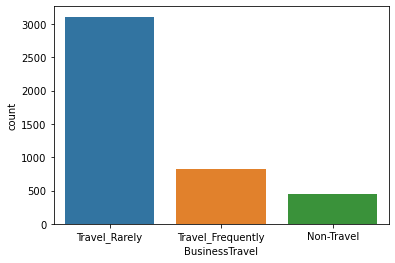

In [4]:
sns.countplot(x = "BusinessTravel",data=df)
plt.show()


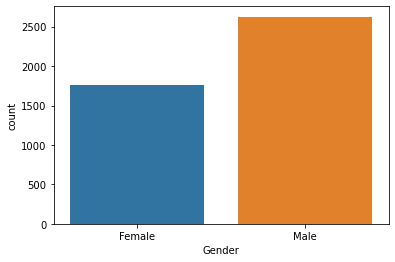

In [5]:
#u ovom grafikonu vidimo da je u firmi zastupljen veci broj muskih osoba

sns.countplot(x = "Gender",data=df)
plt.show()


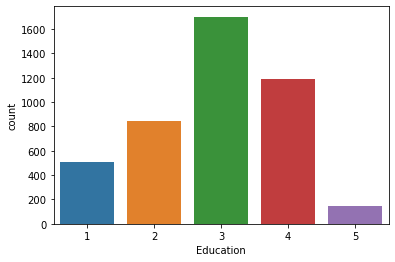

In [6]:
sns.countplot(x = "Education",data=df)
plt.show()


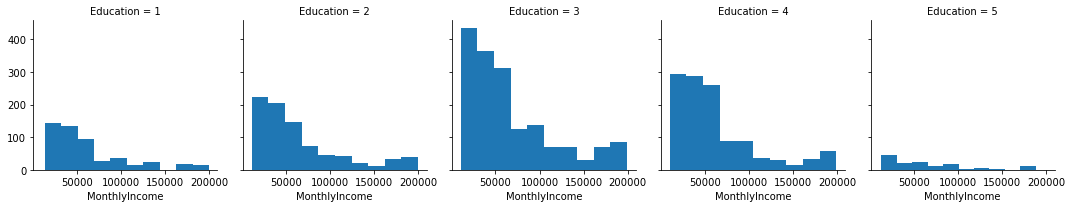

In [7]:
age = sns.FacetGrid(df, col='Education')
age.map(plt.hist, "MonthlyIncome")
plt.show()


In [8]:
df.fillna(0,inplace=True)

In [9]:

df.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1, inplace = True)

In [10]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [11]:
print(len(df))
print(len(df[df['Attrition']=='Yes']))
print(len(df[df['Attrition']=='No']))
print("percentage of yes Attrition is:",(len(df[df['Attrition']=='Yes'])/len(df))*100,"%")
print("percentage of no Attrition is:",(len(df[df['Attrition']=='No'])/len(df))*100,"%")

4382
705
3677
percentage of yes Attrition is: 16.08854404381561 %
percentage of no Attrition is: 83.91145595618438 %


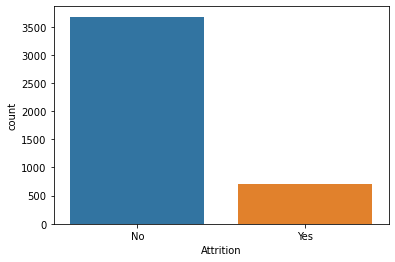

In [12]:
sns.countplot(x = "Attrition",data=df)
plt.show()

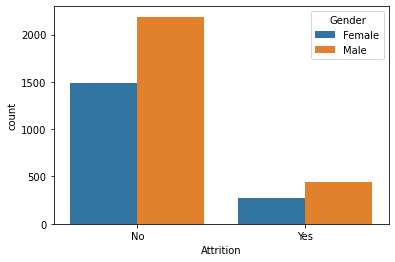

In [13]:
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

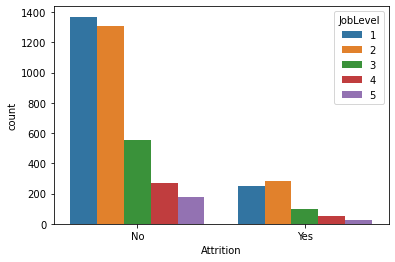

In [14]:
sns.countplot(x = "Attrition",data=df,hue="JobLevel")
plt.show()


In [15]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(df); 


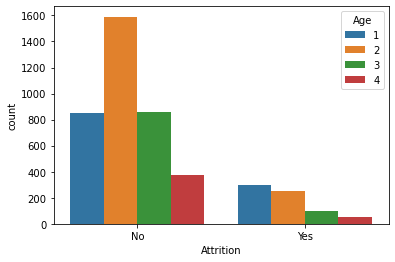

In [16]:
sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18'] = labelEncoder_X.fit_transform(df['Over18'])

In [18]:

from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])

In [19]:
df.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0    4          0               2           2                 6          2   
1    2          1               1           1                10          1   
2    2          0               1           1                17          4   
3    2          0               0           1                 2          5   
4    2          0               2           1                10          1   

   EducationField  Gender  JobLevel  JobRole  ...  MonthlyIncome  \
0               1       0         1        0  ...         131160   
1               1       0         1        6  ...          41890   
2               4       1         4        7  ...         193280   
3               1       1         3        1  ...          83210   
4               3       1         1        7  ...          23420   

   NumCompaniesWorked  Over18  PercentSalaryHike  StockOptionLevel  \
0                 1.0       0                 11                 0   
1                 0.0       0                 23                 1   
2                 1.0       0                 15                 3   
3                 3.0       0                 11                 3   
4                 4.0       0                 12                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 21 columns]

In [20]:
colone=["Age", "JobLevel", "DistanceFromHome", "PercentSalaryHike","YearsWithCurrManager","TrainingTimesLastYear","YearsAtCompany"]
y = df['Attrition']
kolona= df.drop('Attrition', axis = 1)
x = pd.get_dummies(df[colone])

#x=pd.get_dummies(kolona)

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.20, random_state=42)

In [21]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
print("Tacnost pomocu knn: {}".format(knn.score(test_x, test_y)))


sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=30000, tol=1e-3))
sgd.fit(train_x, train_y)
print("Tacnost pomocu sgd: {}".format(sgd.score(train_x, train_y)))

clf = Perceptron()
clf.fit(train_x, train_y)
print("Tacnost pomocu perceptrona: {}".format(clf.score(test_x, test_y)))

log_red = LogisticRegression()
log_red.fit(train_x, train_y)
print("Tacnost pomocu linearne regresije: {}".format(log_red.score(test_x, test_y)))


Tacnost pomocu knn: 0.7822120866590649
Tacnost pomocu sgd: 0.8336661911554921
Tacnost pomocu perceptrona: 0.8563283922462942
Tacnost pomocu linearne regresije: 0.8608893956670467


In [22]:

test = pd.get_dummies(df[colone])

clf.fit(train_x, train_y)
predikcija = clf.predict(test)

#rezultat = pd.DataFrame({'Age': df.Age,'JobLevel': df.JobLevel,'BusinessTravel': df.BusinessTravel,'Department':df.Department,'Over18':df.Over18,'YearsWithCurrManager':df.YearsWithCurrManager, 'Attrition': predikcija})
rezultat = pd.DataFrame({ 'Age':df.Age, 'JobLevel':df.JobLevel, 'DistanceFromHome':df.DistanceFromHome, 'PercentSalaryHike':df.PercentSalaryHike,'TrainingTimesLastYear':df.TrainingTimesLastYear,'YearsAtCompany':df.YearsAtCompany, 'Attrition': predikcija})

rezultat.to_csv('rezultat.csv')

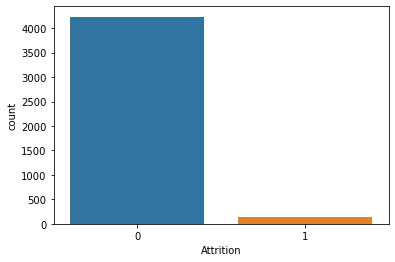

In [23]:
df = pd.read_csv("rezultat.csv",sep=",")
sns.countplot(x = "Attrition",data=df)
plt.show()

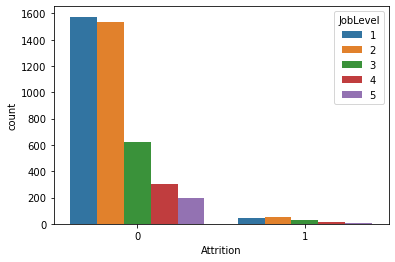

In [24]:
df = pd.read_csv("rezultat.csv",sep=",")
sns.countplot(x = "Attrition",data=df,hue="JobLevel")
plt.show()

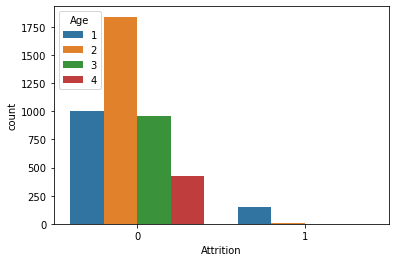

In [25]:
sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()